In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', None)

In [3]:
credit['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [4]:
credit['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [5]:
credit.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Checking the Percentage Classification of Fraud Cases

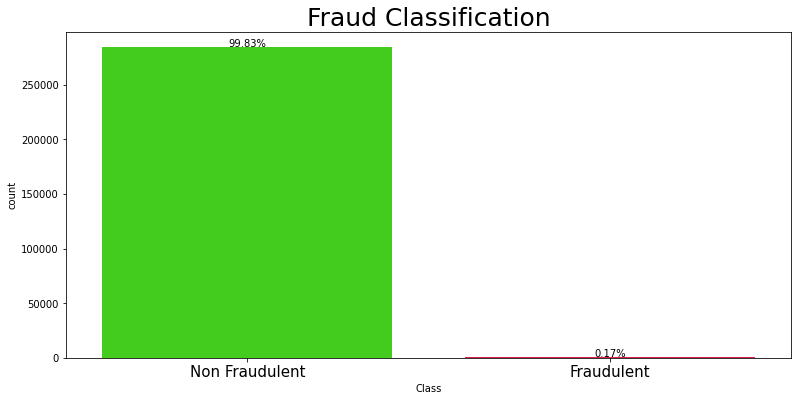

In [6]:
plt.figure(figsize = (13,6))
Index = [0,1]
total = float(len(credit))
ax =sns.countplot(x = 'Class', data = credit, palette = 'prism')
plt.title(' Fraud Classification ', fontsize = 25)
plt.xticks(Index,['Non Fraudulent','Fraudulent'], fontsize = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(100*(height/total)),
            ha="center") 
plt.show()

#### There are 99.83% Non Fraudulent cases and 0.17% Fraudulent cases

# Effect of Time and Amount on Class (Fraud or Non Fraud) 

In [7]:
Legit_case = credit[credit['Class']==0]
Fraud_case = credit[credit['Class']==1]

print("Fraud transaction statistics")
print(Fraud_case["Amount"].describe())
print("\nNormal transaction statistics")
print(Legit_case["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


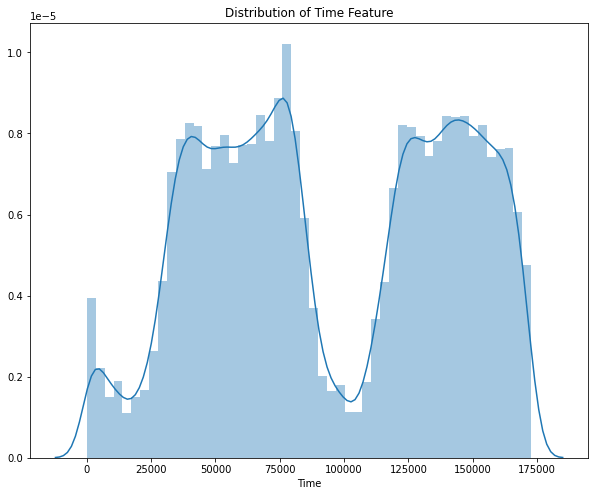

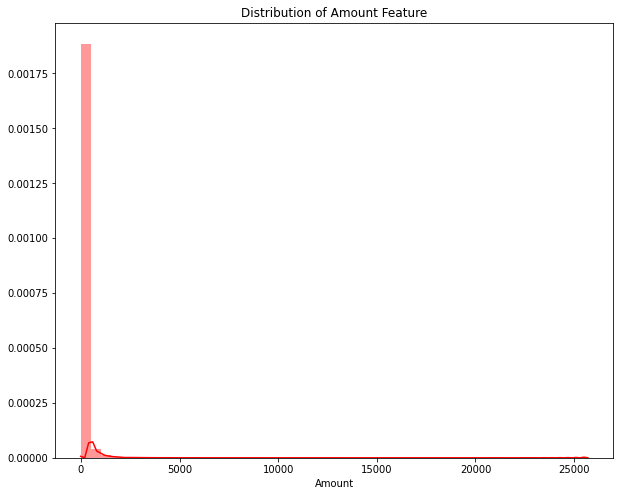

In [8]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(credit.Time)

plt.figure(figsize=(10,8))
plt.title('Distribution of Amount Feature')
sns.distplot(credit.Amount, color='red')

### TIME FEATURES


In [9]:
time_delta = pd.to_timedelta(credit['Time'], unit='s')
credit['Time_min'] = (time_delta.dt.components.minutes).astype(int)
credit['Time_hour'] = (time_delta.dt.components.hours).astype(int)

### Exploring the distribuition by Class types through hours and minutes


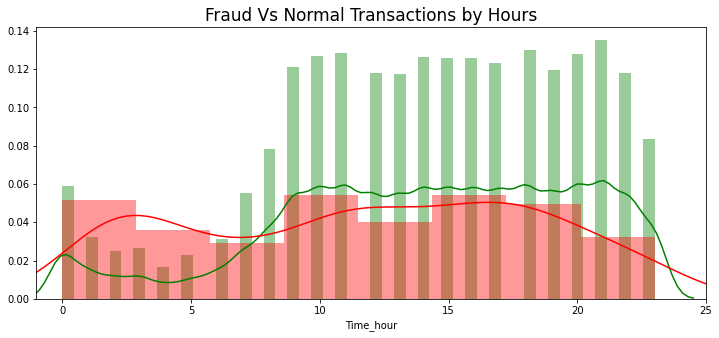

In [10]:
plt.figure(figsize=(12,5))


sns.distplot(credit[credit['Class'] == 0]["Time_hour"], # Legit transactions
             color='g')
sns.distplot(credit[credit['Class'] == 1]["Time_hour"], # Fraudulent transactions
             color='r')
plt.title('Fraud Vs Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

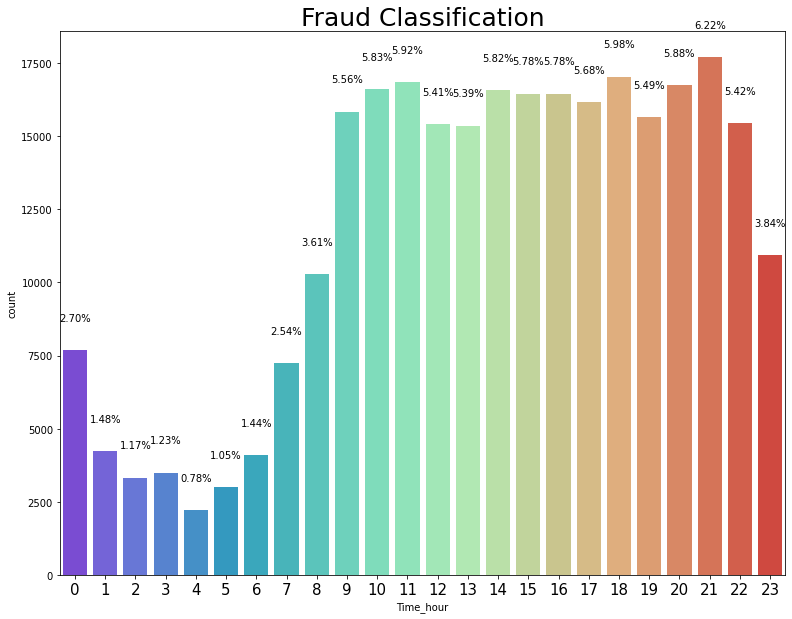

In [11]:
plt.figure(figsize=(13,10))

Index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
total = float(len(credit))
ax =sns.countplot(x = credit['Time_hour'], data = credit, palette = 'rainbow',saturation=0.6)
plt.title(' Fraud Classification ', fontsize = 25)
plt.xticks(Index, fontsize = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(100*(height/total)),
            ha="center") 
plt.show()



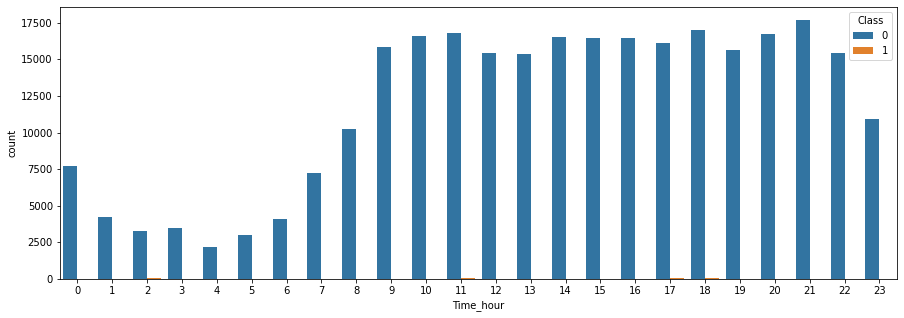

In [12]:

plt.figure(figsize=(15,5))

sns.countplot(x =credit['Time_hour'], data = credit,hue = 'Class' )

In [13]:
import datetime
def convert_totime(hours):
    return datetime.datetime.fromtimestamp(hours);

TimeFrame = credit[['Time', 'Amount', 'Class']].copy()
TimeFrame['datetime'] = TimeFrame.Time.apply(convert_totime)